In [1]:
from typing import Any, Callable, Sequence
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators

Testing percolation vals for config 2/2 'g4': 100%|██████████| 16/16 [00:00<00:00, 32.09it/s]


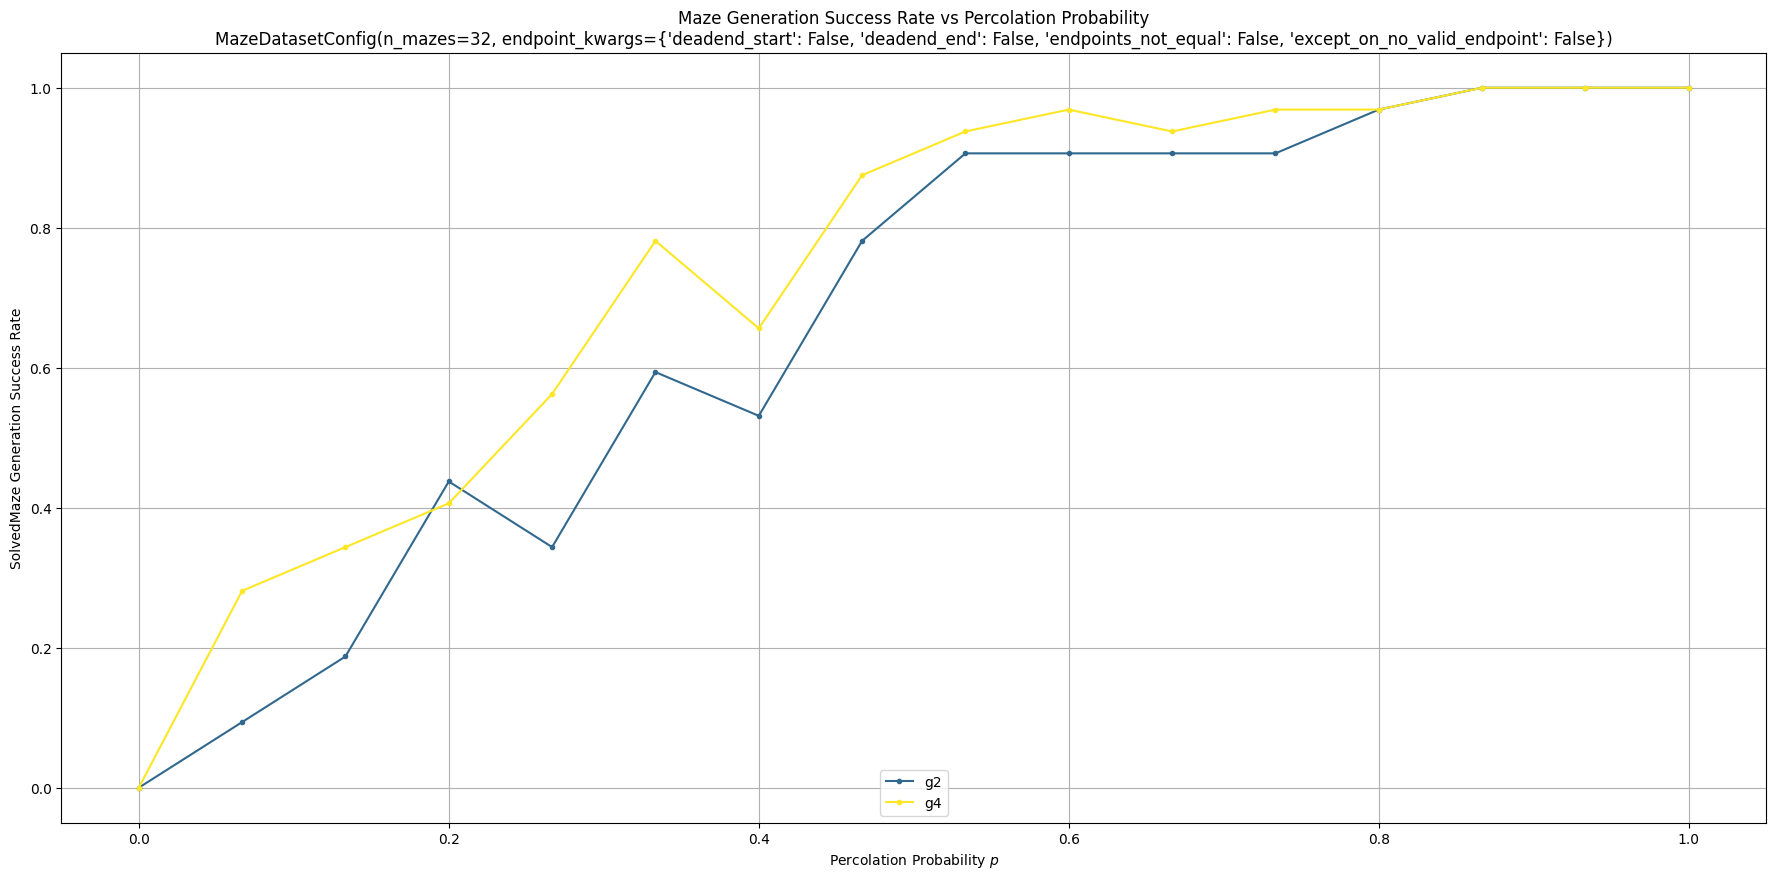

<Axes: title={'center': "Maze Generation Success Rate vs Percolation Probability\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='Percolation Probability $p$', ylabel='SolvedMaze Generation Success Rate'>

In [2]:
def analyze_percolation_success(
    configs: list[MazeDatasetConfig],
    p_values: np.ndarray,
) -> dict[str, Any]:
    """Analyze success rate of maze generation for different percolation values

    # Parameters:
     - `configs : list[MazeDatasetConfig]`
       configs to try
     - `p_values : np.ndarray`
       numpy array of percolation probability values to test

    # Returns:
    `dict[str, Any]` with the following:
    - `"configs": list[MazeDatasetConfig]`
       List of MazeDatasetConfig objects used for testing
    - `"p_values": np.ndarray`
    - `"results": dict[str, np.ndarray]`
       Dictionary mapping config names to arrays of success rates
    """

    success_rates: dict[str, np.ndarray] = {}

    for idx_cfg, cfg in enumerate(configs):
        rates: list[float] = []
        for p in tqdm(
            p_values,
            desc=f"Testing percolation vals for config {idx_cfg + 1}/{len(configs)} '{cfg.name}'",
            total=len(p_values),
        ):
            cfg_dict: dict = cfg.serialize()
            cfg_dict["maze_ctor_kwargs"]["p"] = float(p)
            cfg_test: MazeDatasetConfig = MazeDatasetConfig.load(cfg_dict)

            dataset: MazeDataset = MazeDataset.from_config(
                cfg_test,
                do_download=False,
                load_local=False,
                save_local=False,
                verbose=False,
            )

            rates.append(len(dataset) / cfg_test.n_mazes)

        rates_array = np.array(rates)
        success_rates[cfg_test.name] = rates_array

    return dict(configs=configs, p_values=p_values, success_rates=success_rates)


def plot_percolation_results(
    results: dict[str, Any],
    save_path: str = None,
    cfg_keys: list[str] | None = None,
    cmap_name: str | None = "viridis",
    plot_only: bool = False,
    show: bool = True,
    ax: plt.Axes | None = None,
) -> plt.Axes:
    """Plot the results of percolation analysis.

    # Parameters:
     - `results : dict[str, Any]`
       results dict from `analyze_percolation_success`
     - `save_path : str`
       Path to save the plot to, will display if `None`
       (defaults to `None`)
    """
    # set up figure
    if not ax:
        fig: plt.Figure
        ax: plt.Axes
        fig, ax = plt.subplots(1, 1, figsize=(22, 10))

    # plot
    cmap = plt.get_cmap(cmap_name)
    n_cfgs: int = len(results["success_rates"])
    for i, (ep_cfg_name, success_rates) in enumerate(results["success_rates"].items()):
        ax.plot(
            results["p_values"],
            success_rates,
            ".-",
            label=ep_cfg_name,
            color=cmap((i + 0.5) / (n_cfgs - 0.5)),
        )

    # add title and stuff
    if not plot_only:
        ax.set_xlabel("Percolation Probability $p$")
        ax.set_ylabel("SolvedMaze Generation Success Rate")
        cfg: MazeDatasetConfig = results["configs"][0]
        ax.set_title(
            "Maze Generation Success Rate vs Percolation Probability\n"
            + (
                repr(cfg)
                if cfg_keys is None
                else (
                    "MazeDatasetConfig("
                    + ", ".join(
                        [
                            f"{k}={getattr(cfg, k).__name__}"
                            if isinstance(getattr(cfg, k), Callable)
                            else f"{k}={getattr(cfg, k)}"
                            for k in cfg_keys
                        ]
                    )
                    + ")"
                )
            )
        )
        ax.grid(True)
        ax.legend(loc="lower center")

    # save and show
    if save_path:
        plt.savefig(save_path)

    if show:
        plt.show()

    return ax


# Run the analysis
results: dict[str, Any] = analyze_percolation_success(
    configs=[
        MazeDatasetConfig(
            name=f"g{grid_n}",
            grid_n=grid_n,
            n_mazes=32,
            maze_ctor=LatticeMazeGenerators.gen_percolation,
            maze_ctor_kwargs=dict(),
            endpoint_kwargs=dict(
                deadend_start=False,
                deadend_end=False,
                endpoints_not_equal=False,
                except_on_no_valid_endpoint=False,
            ),
        )
        for grid_n in [2, 4]
    ],
    p_values=np.linspace(0.0, 1.0, 16),
)

# Plot results
plot_percolation_results(
    results, save_path=None, cfg_keys=["n_mazes", "endpoint_kwargs"]
)



# Analyzing 1/6: endpoint_kwargs 'any', gen_func=gen_percolation




Testing percolation vals for config 1/4 'g2-perc': 100%|██████████| 50/50 [00:06<00:00,  7.49it/s]
Testing percolation vals for config 2/4 'g4-perc': 100%|██████████| 50/50 [00:17<00:00,  2.91it/s]
Testing percolation vals for config 3/4 'g8-perc': 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
Testing percolation vals for config 4/4 'g16-perc': 100%|██████████| 50/50 [03:45<00:00,  4.50s/it]




# Analyzing 2/6: endpoint_kwargs 'any', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/4 'g2-dfs_perc': 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
Testing percolation vals for config 2/4 'g4-dfs_perc': 100%|██████████| 50/50 [00:39<00:00,  1.28it/s]
Testing percolation vals for config 3/4 'g8-dfs_perc': 100%|██████████| 50/50 [02:31<00:00,  3.04s/it]
Testing percolation vals for config 4/4 'g16-dfs_perc': 100%|██████████| 50/50 [10:21<00:00, 12.44s/it]


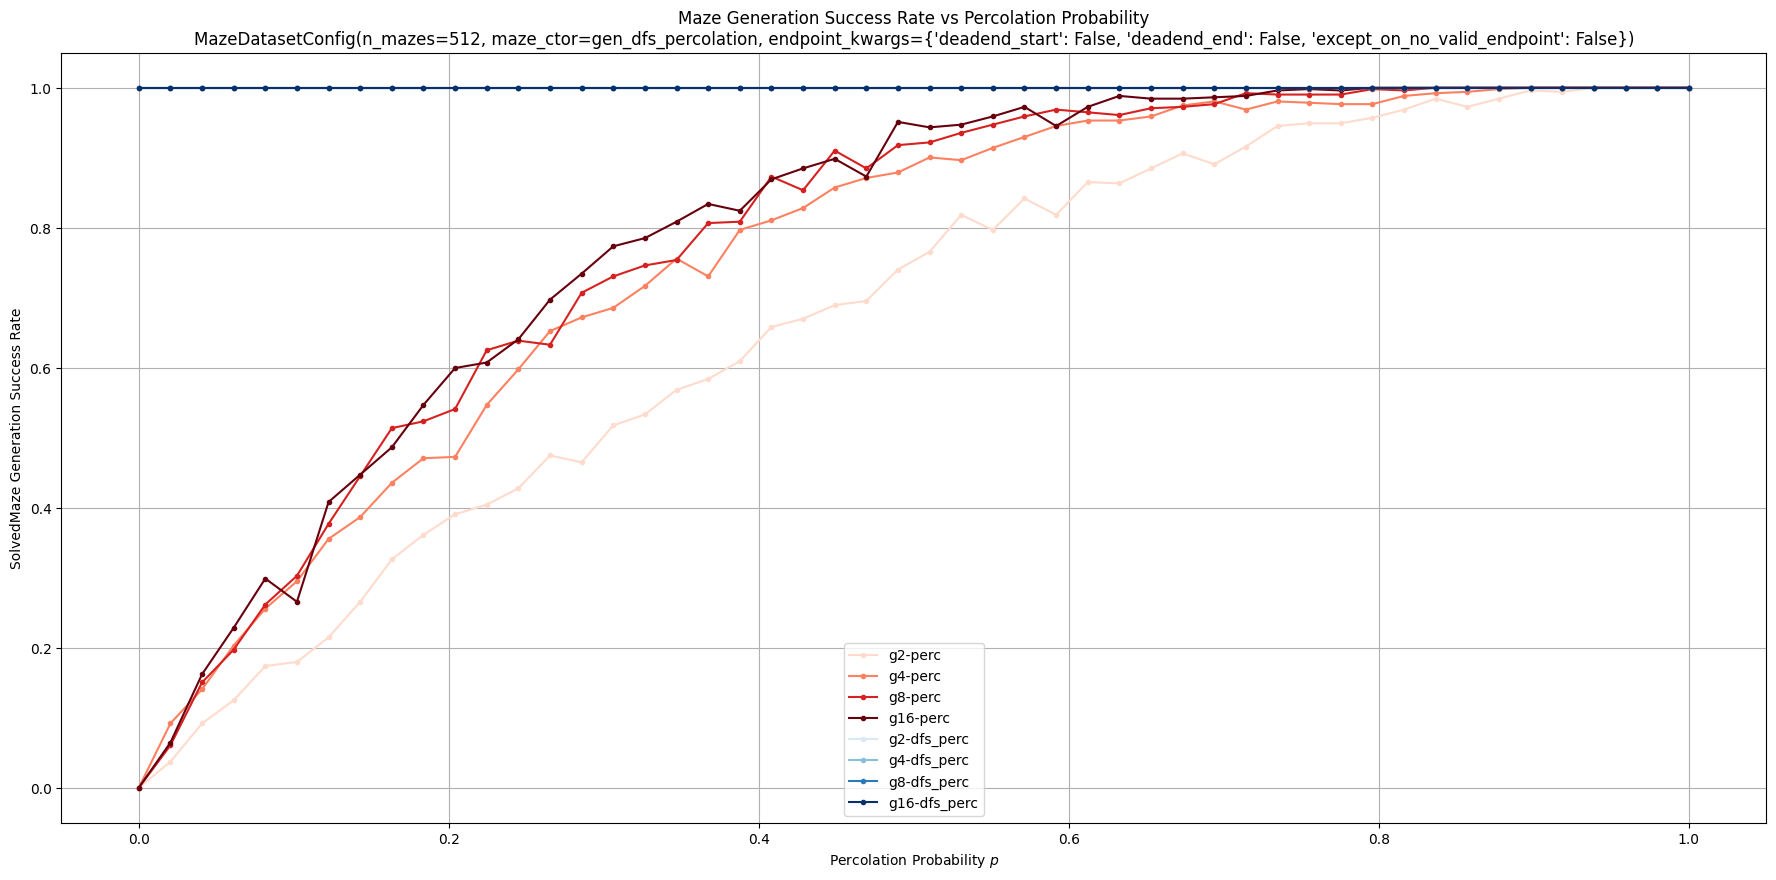



# Analyzing 3/6: endpoint_kwargs 'deadends', gen_func=gen_percolation




Testing percolation vals for config 1/4 'g2-perc': 100%|██████████| 50/50 [00:09<00:00,  5.23it/s]
Testing percolation vals for config 2/4 'g4-perc': 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]
Testing percolation vals for config 3/4 'g8-perc': 100%|██████████| 50/50 [01:58<00:00,  2.38s/it]
Testing percolation vals for config 4/4 'g16-perc': 100%|██████████| 50/50 [07:57<00:00,  9.55s/it]




# Analyzing 4/6: endpoint_kwargs 'deadends', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/4 'g2-dfs_perc': 100%|██████████| 50/50 [00:16<00:00,  3.05it/s]
Testing percolation vals for config 2/4 'g4-dfs_perc': 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]
Testing percolation vals for config 3/4 'g8-dfs_perc': 100%|██████████| 50/50 [04:35<00:00,  5.50s/it]
Testing percolation vals for config 4/4 'g16-dfs_perc': 100%|██████████| 50/50 [19:20<00:00, 23.22s/it]


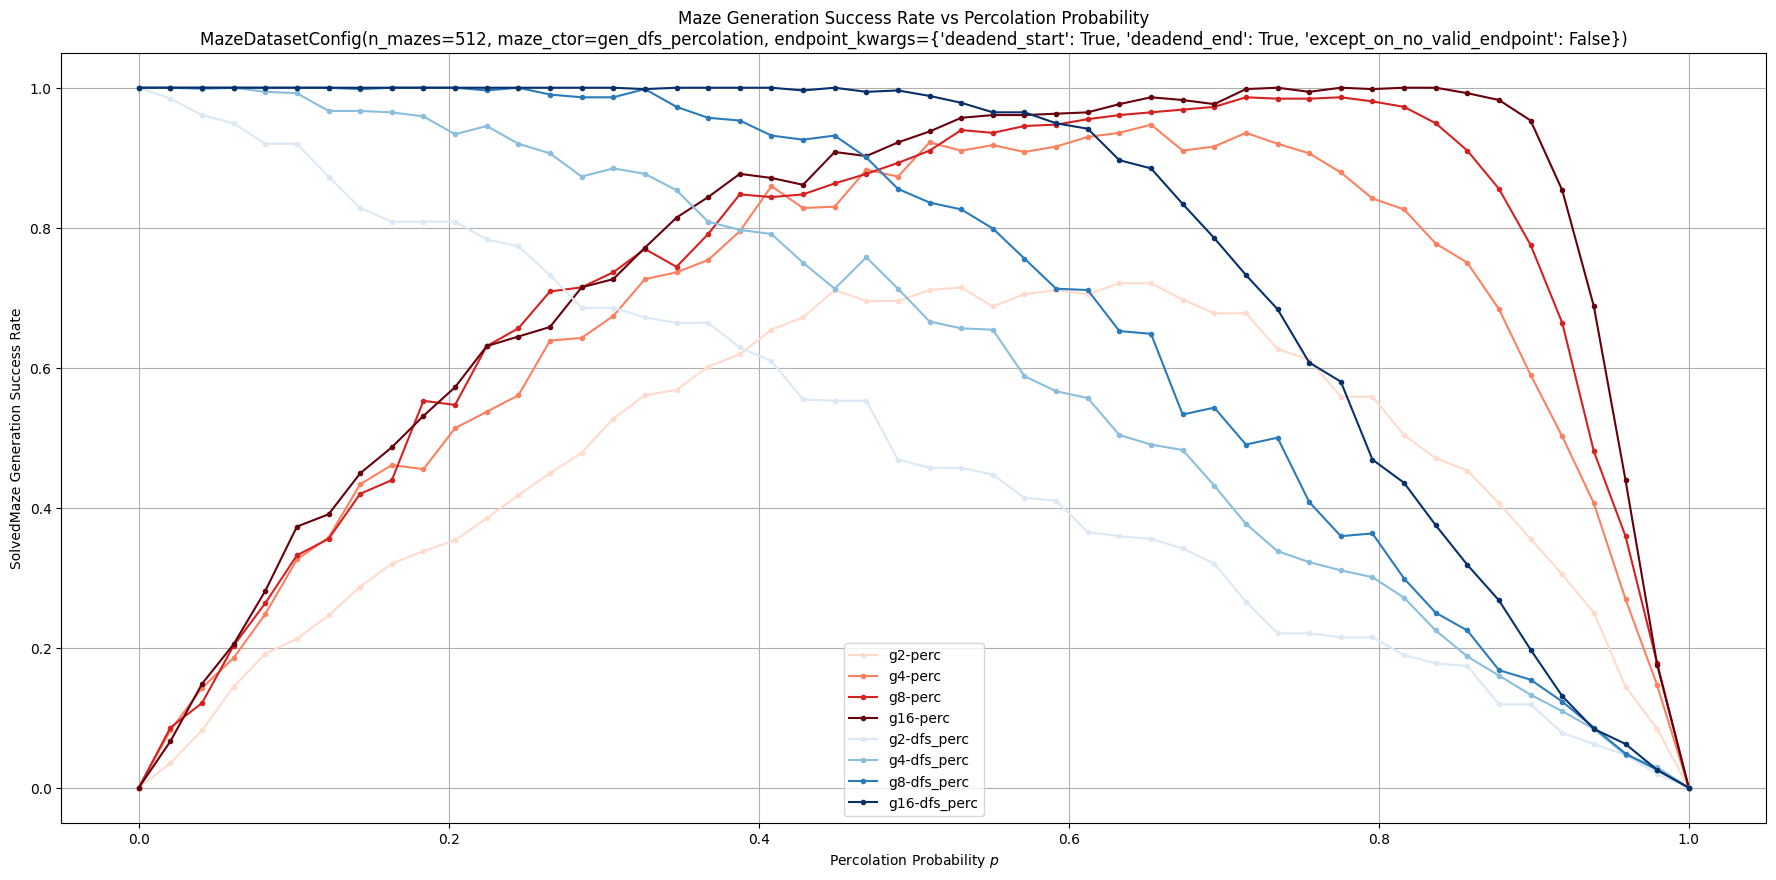



# Analyzing 5/6: endpoint_kwargs 'deadends_unique', gen_func=gen_percolation




Testing percolation vals for config 1/4 'g2-perc': 100%|██████████| 50/50 [00:09<00:00,  5.29it/s]
Testing percolation vals for config 2/4 'g4-perc': 100%|██████████| 50/50 [00:32<00:00,  1.55it/s]
Testing percolation vals for config 3/4 'g8-perc': 100%|██████████| 50/50 [01:58<00:00,  2.38s/it]
Testing percolation vals for config 4/4 'g16-perc': 100%|██████████| 50/50 [07:49<00:00,  9.39s/it]




# Analyzing 6/6: endpoint_kwargs 'deadends_unique', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/4 'g2-dfs_perc': 100%|██████████| 50/50 [00:16<00:00,  3.10it/s]
Testing percolation vals for config 2/4 'g4-dfs_perc': 100%|██████████| 50/50 [01:03<00:00,  1.28s/it]
Testing percolation vals for config 3/4 'g8-dfs_perc': 100%|██████████| 50/50 [04:31<00:00,  5.43s/it]
Testing percolation vals for config 4/4 'g16-dfs_perc': 100%|██████████| 50/50 [18:57<00:00, 22.74s/it]


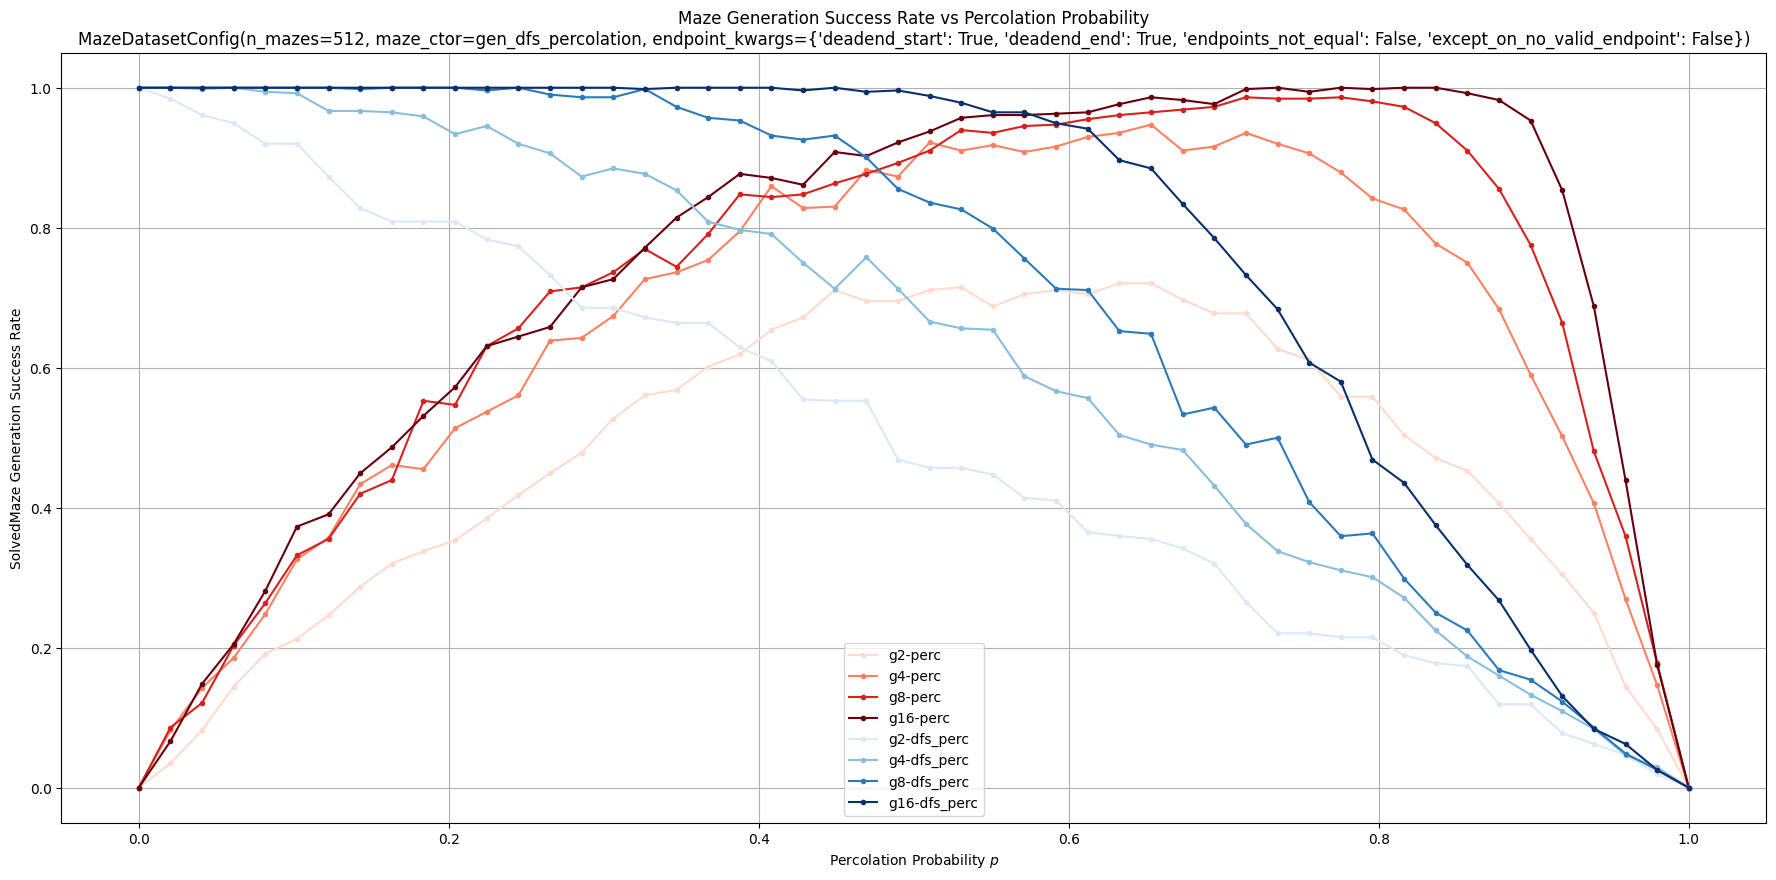

In [3]:
DEFAULT_ENDPOINT_KWARGS: list[tuple[str, dict]] = [
    (
        "any",
        dict(deadend_start=False, deadend_end=False, except_on_no_valid_endpoint=False),
    ),
    (
        "deadends",
        dict(deadend_start=True, deadend_end=True, except_on_no_valid_endpoint=False),
    ),
    (
        "deadends_unique",
        dict(
            deadend_start=True,
            deadend_end=True,
            endpoints_not_equal=False,
            except_on_no_valid_endpoint=False,
        ),
    ),
]


def full_analysis(
    n_mazes: int,
    p_val_count: int,
    grid_sizes: list[int],
    ep_kwargs: list[tuple[str, dict]] | None = None,
    generators: Sequence[Callable] = (
        LatticeMazeGenerators.gen_percolation,
        LatticeMazeGenerators.gen_dfs_percolation,
    ),
    save_dir: Path = Path("../docs/benchmarks/percolation_fractions"),
) -> None:
    if ep_kwargs is None:
        ep_kwargs = DEFAULT_ENDPOINT_KWARGS

    total_cfgs: int = len(generators) * len(ep_kwargs)
    cfg_idx: int = 0

    # for i, ((ep_kw_name, ep_kw), gen_func) in enumerate(cfg_augment_product):
    for ep_kw_name, ep_kw in ep_kwargs:
        fig, ax = plt.subplots(1, 1, figsize=(22, 10))
        for gf_idx, gen_func in enumerate(generators):
            cfg_idx += 1
            print(
                f"\n\n# Analyzing {cfg_idx}/{total_cfgs}: endpoint_kwargs '{ep_kw_name}', gen_func={gen_func.__name__}\n\n"
            )
            ax = plot_percolation_results(
                analyze_percolation_success(
                    configs=[
                        MazeDatasetConfig(
                            name=f"g{grid_n}-{gen_func.__name__.removeprefix('gen_').removesuffix('olation')}",
                            grid_n=grid_n,
                            n_mazes=n_mazes,
                            maze_ctor=gen_func,
                            maze_ctor_kwargs=dict(),
                            endpoint_kwargs=ep_kw,
                        )
                        for grid_n in grid_sizes
                    ],
                    p_values=np.linspace(0.0, 1.0, p_val_count),
                ),
                cfg_keys=["n_mazes", "maze_ctor", "endpoint_kwargs"],
                ax=ax,
                show=False,
                cmap_name="Reds" if gf_idx == 0 else "Blues",
            )
        # save the figure
        plt.savefig(save_dir / f"n_{n_mazes}-pvc_{p_val_count}-ep_{ep_kw_name}.svg")
        plt.show()


full_analysis(
    n_mazes=512,
    p_val_count=50,
    grid_sizes=[2, 4, 8, 16],
)